# Sentiment Analysis - SVM with TFIDF Term Weighting

`SVM Kernel = Linear; Term Weighting = TFIDF`

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np 
import re #RegEx
import itertools
import matplotlib.pyplot as plt

from sklearn import svm #Import SVM Classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #Count Vector Space Model
from sklearn import metrics #Matrix Builder
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #Import KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.metrics import classification_report

## Load Dataset

*Dataset is already preprocessed before.*

In [2]:
df = pd.read_csv('data/clean_tweets.csv')
df #Print Dataset

,tweet,stemming,label
0,#AyoTolakUUIKN \n\nProyek IKN membuka peluang ...,"['proyek', 'ikn', 'buka', 'peluang', 'oligarki...",0.0
1,Tolak UU IKN karena berpotensi merusak lingkun...,"['tolak', 'uu', 'ikn', 'potensi', 'rusak', 'li...",0.0
2,UU IKN hanya akan merugikan rakyat dengan huta...,"['uu', 'ikn', 'rugi', 'rakyat', 'hutang', 'rib...",0.0
3,Jika UU ini diterapkan yang terjadi adalah mas...,"['uu', 'terap', 'masyarakat', 'rasa', 'rugi', ...",0.0
4,UU IKN Syarat kepentingan oligarki. Tolak n ba...,"['uu', 'ikn', 'syarat', 'penting', 'oligarki',...",0.0
...,...,...,...
5887,Horee!! Kabar gembira gaes!\nProses pemindahan...,"['horee', 'kabar', 'gembira', 'proses', 'pinda...",1.0
5888,Juru Bicara Presiden RI Fadjroel Rachman menga...,"['juru', 'bicara', 'presiden', 'ri', 'fadjroel...",1.0
5889,Pemerintah Indonesia mengajak Korea Selatan un...,"['perintah', 'indonesia', 'ajak', 'korea', 'se...",1.0
5890,@pikiran_rakyat masalah Jakarta tepatnya harus...,"['jakarta', 'tepat', 'asai', 'hadap', 'selesai...",0.0


In [3]:
df = df.dropna()
df = df.reset_index(drop=True)

*Count each labels total value*

In [4]:
df['label'].value_counts()

1.0    3750
0.0    2142
Name: label, dtype: int64

### Implementing TFIDF Feature Weighthing

In [6]:
tfidf_vect = TfidfVectorizer(use_idf = True ,max_features = 5000)
x = tfidf_vect.fit(df['stemming'])
TFIDF = x.transform(df['stemming'])

In [7]:
print(TFIDF)

  (0, 4802)	0.14315601373542752
  (0, 4537)	0.16622470060891656
  (0, 3308)	0.162865630853309
  (0, 3127)	0.2922233702990785
  (0, 3010)	0.1905257547058482
  (0, 2470)	0.3113803845039028
  (0, 1720)	0.10361096909940386
  (0, 1075)	0.7838492709064525
  (0, 838)	0.285557828291107
  (1, 4802)	0.21886047921909518
  (1, 4537)	0.25412846225624514
  (1, 3595)	0.46125329379223834
  (1, 3308)	0.2489930327534278
  (1, 3248)	0.39040563665728034
  (1, 3010)	0.2912805189977316
  (1, 2582)	0.2780686167500103
  (1, 2515)	0.3865002311618443
  (1, 2415)	0.3517238658165412
  (1, 1720)	0.15840303007709808
  (2, 4802)	0.18108261184102664
  (2, 4638)	0.4824219756668292
  (2, 3579)	0.32731851979175763
  (2, 3506)	0.4543325604065755
  (2, 3371)	0.21456625059371806
  (2, 3308)	0.20601393573698765
  :	:
  (5890, 3131)	0.3144465580261046
  (5890, 2931)	0.04990982269454878
  (5890, 2582)	0.15342738756306706
  (5890, 2297)	0.049193870881259344
  (5890, 1944)	0.28690044962023814
  (5890, 1941)	0.27293939632187253


*Separate label to its own representative array*

In [8]:
label = []
for data in df['label']:
    label.append(data)
kolom = label.pop

In [9]:
def Average(lst):
    return sum(lst) / len(lst)

### KFold Cross Validation

In [10]:
folds = range(2,11)
for k in folds:
    accuracy=[]
    kFoldCrossValidation = KFold(n_splits=k, random_state=0, shuffle = True)
    for train, test in kFoldCrossValidation.split(TFIDF, label):
        trainData, testData = TFIDF[train], TFIDF[test]
        label = np.array(label)
        trainData2, testData2 = label[train], label[test]
        
        SVM = SVC(kernel = 'linear', C = 1)
        model = SVM.fit(trainData, trainData2)
        prediksi = model.predict(testData)
        
        accuracy.append(accuracy_score(testData2, prediksi))
        
    print('Folds : %d | Accuracy : %.3f | Max, Min : %.3f, %.3f' 
          % (k, Average(accuracy), max(accuracy), min(accuracy)))
    print("\n")

Folds : 2 | Accuracy : 0.871 | Max, Min : 0.871, 0.870


Folds : 3 | Accuracy : 0.873 | Max, Min : 0.876, 0.870


Folds : 4 | Accuracy : 0.877 | Max, Min : 0.889, 0.872


Folds : 5 | Accuracy : 0.878 | Max, Min : 0.885, 0.872


Folds : 6 | Accuracy : 0.878 | Max, Min : 0.887, 0.864


Folds : 7 | Accuracy : 0.880 | Max, Min : 0.892, 0.868


Folds : 8 | Accuracy : 0.879 | Max, Min : 0.887, 0.867


Folds : 9 | Accuracy : 0.879 | Max, Min : 0.890, 0.870


Folds : 10 | Accuracy : 0.879 | Max, Min : 0.893, 0.864




### Implementing KFold with chosen K value

In [16]:
#K-Fold Cross Validation will iterate k times
kFoldCrossValidation = KFold(n_splits=7, random_state=0, shuffle = True)

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)
    
for train, test in kFoldCrossValidation.split(TFIDF, label):
    #Initiate Train and Test Data then transform to TFIDF value. Then copy to new Train and Test variables. 
    trainData, testData = TFIDF[train], TFIDF[test]
    label = np.array(label)
    trainData2, testData2 = label[train], label[test]
    
    SVM = SVC(kernel = 'linear', C = 1)
    model = SVM.fit(trainData, trainData2)
    prediksi = model.predict(testData)
    
    actual_classes = np.append(actual_classes, label[test])
    predicted_classes = np.append(predicted_classes, model.predict(testData))
   
    accuracy.append(accuracy_score(testData2, prediksi))

conf_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)
svm_accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
precision = metrics.precision_score(actual_classes, predicted_classes, average='binary')
recall = metrics.recall_score(actual_classes, predicted_classes, average='binary')
f1score = metrics.f1_score(actual_classes, predicted_classes, average='binary')

print("\nConfusion Matrix: \n", conf_matrix)
print("------------------------------------------------------------")
print(classification_report(actual_classes, predicted_classes, digits = 4,
                           target_names = ['Positive', 'Negative']))
print("------------------------------------------------------------")
print("\nAccuracy : %.3f, Precission : %.3f, Recall : %.3f, F1 Score : %.3f" %(svm_accuracy, precision, recall, f1score))


Confusion Matrix: 
 [[1676  466]
 [ 243 3507]]
------------------------------------------------------------
              precision    recall  f1-score   support

    Positive     0.8734    0.7824    0.8254      2142
    Negative     0.8827    0.9352    0.9082      3750

    accuracy                         0.8797      5892
   macro avg     0.8780    0.8588    0.8668      5892
weighted avg     0.8793    0.8797    0.8781      5892

------------------------------------------------------------

Accuracy : 0.880, Precission : 0.883, Recall : 0.935, F1 Score : 0.908


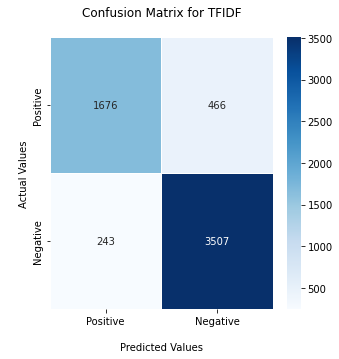

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
ax = sns.heatmap(conf_matrix, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
ax.set_title("Confusion Matrix for TFIDF\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")
plt.show()